In [1]:
!pip install matplotlib
!pip install sklearn
!pip install pandas
!pip install gensim
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
%matplotlib inline

     |████████████████████████████████| 10.3 MB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 15.7 MB 39.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 39.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 36.7 MB/s eta 0:00:01
     |████████████████████████████████| 23.1 MB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 28.5 MB 41.5 MB/s eta 0:00:01     |███████████████████████         | 20.5 MB 41.5 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 51.7 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=6037e1cef11609a15a8e1ee75a7afddf627e6e63893d2ae321576b05931715ff
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
     |████████████████████████████████| 11.3 MB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 24.1 MB 3.7 MB/s eta 0:00:01    |▏         

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
# Importing modules
import pandas as pd
import os
import glob
import csv

# path for original transript csv files
# path = '/home/jovyan/Transcripts/'
# path for speaker grouped transript csv files
path = '/home/jovyan/GroupedTranscripts/'

allfiles = glob.glob(path + "*.csv")
fileList = []
for file in allfiles:
    df = pd.read_csv(file, header=None, sep='\n', quoting=csv.QUOTE_NONE, encoding='utf-8')
    fileList.append(df)

papers = pd.concat(fileList, axis=0, ignore_index=True)

# Print head
papers.head()
# papers.tail(20)


,0
0,CHAIRPERSON: Good morning Mr Pretorius. Goo...
1,ADV PRETORIUS SC: Good morning Chair. [m...
2,"MS K: Good morning. Yes, Chair I underst..."
3,INQUIRY RESUMES:
4,"COUNSEL: Thanks, Chair. Can we comfortably sit..."


In [4]:
# Load the regular expression library
import re
# Remove punctuation
papers['speech_processed'] = \
papers[0].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['speech_processed'] = \
papers['speech_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['speech_processed'].head()
# print(papers.shape)

0    chairperson:   good morning mr pretorius  good...
1    adv pretorius sc:   good morning chair     [mi...
2    ms k:   good morning     yes chair i understan...
3                               inquiry resumes:      
4    counsel: thanks chair can we comfortably sit d...
Name: speech_processed, dtype: object

In [5]:
# remove emojis
import re
papers = papers.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
papers.head()

,0,speech_processed
0,CHAIRPERSON: Good morning Mr Pretorius. Goo...,chairperson: good morning mr pretorius good...
1,ADV PRETORIUS SC: Good morning Chair. [m...,adv pretorius sc: good morning chair [mi...
2,"MS K: Good morning. Yes, Chair I underst...",ms k: good morning yes chair i understan...
3,INQUIRY RESUMES:,inquiry resumes:
4,"COUNSEL: Thanks, Chair. Can we comfortably sit...",counsel: thanks chair can we comfortably sit d...


In [64]:
# remove stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['ja', 'oh', 'chairperson', 'chair', 'mr', 'ms', 'go', 'yes', 'no', 'say', 'know', 'see', 'one', 'neh','adv',
                   'intervenes', 'okay', 'resumes', 'adjourns', 'hm', 'said', 'saying', 'proceed', 'thank', 'good', 'morning',
                  'inquiry', 'thank', 'sc','correct', 'indistinct',' intervenes', 'van', 'der', 'help', 'page', 'think', 
                  'chairman', 'think', 'like', 'page', 'rise', 'court'])
papers['speech_processed1'] = papers['speech_processed'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))
papers['speech_processed1'].head()

0    chairperson: pretorius everybody giving openin...
1    pretorius sc: [microphone muted] k hear us k c...
2    k: understand (suo) able confirm could please ...
3                                             resumes:
4    counsel: thanks comfortably sit avoided interr...
Name: speech_processed1, dtype: object

Loading dataset...
done in 0.001s.
Extracting tf-idf features for NMF...
done in 4.654s.
Extracting tf features for LDA...
done in 4.901s.

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2500 and n_features=1000...
done in 4.220s.


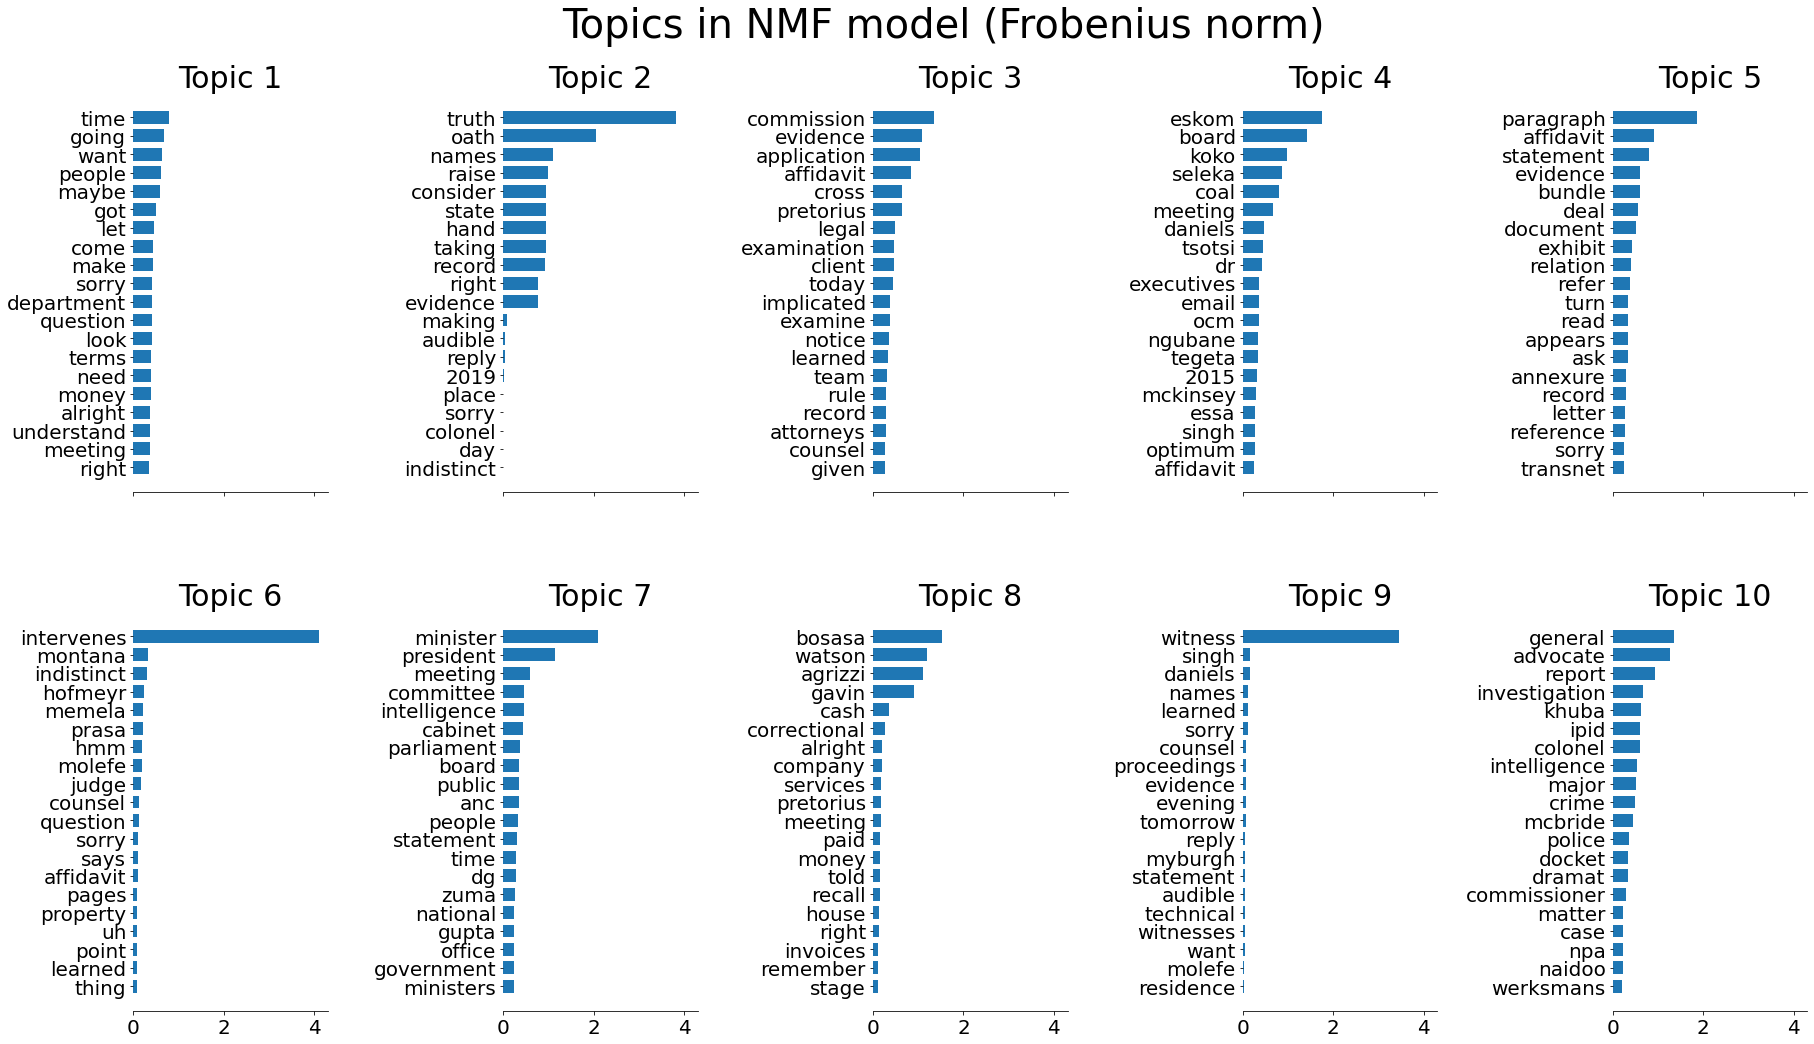

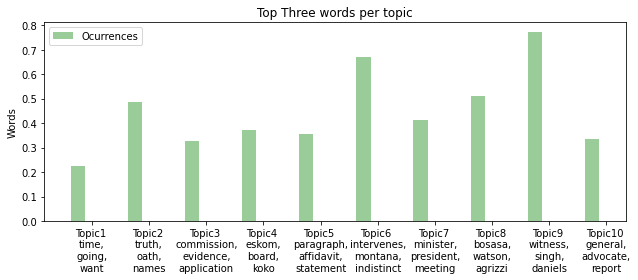



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2500 and n_features=1000...


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


done in 11.520s.


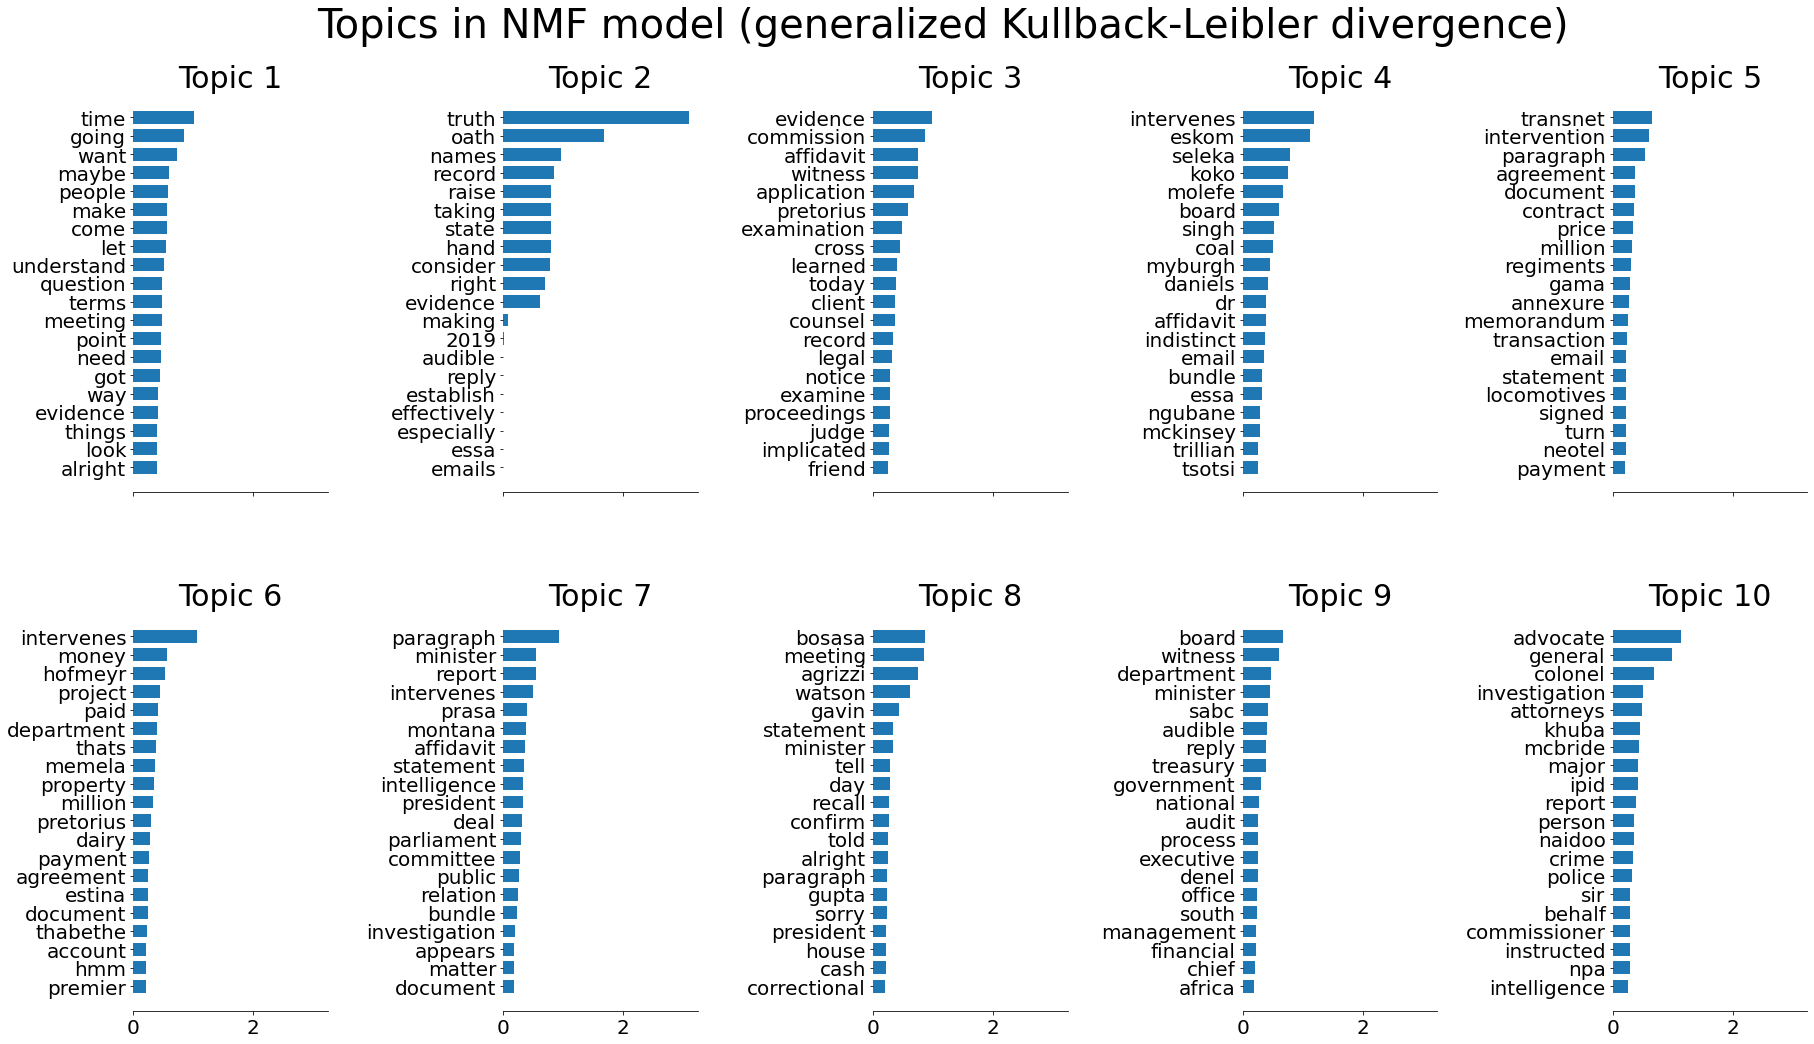

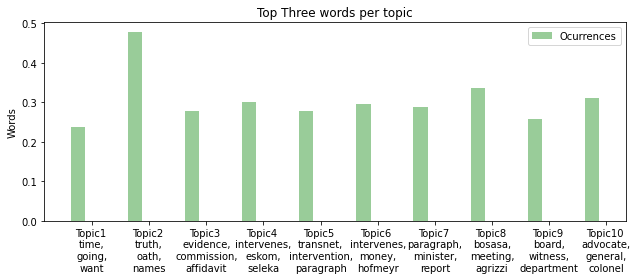



 Fitting LDA models with tf features, n_samples=2500 and n_features=1000...
done in 18.347s.


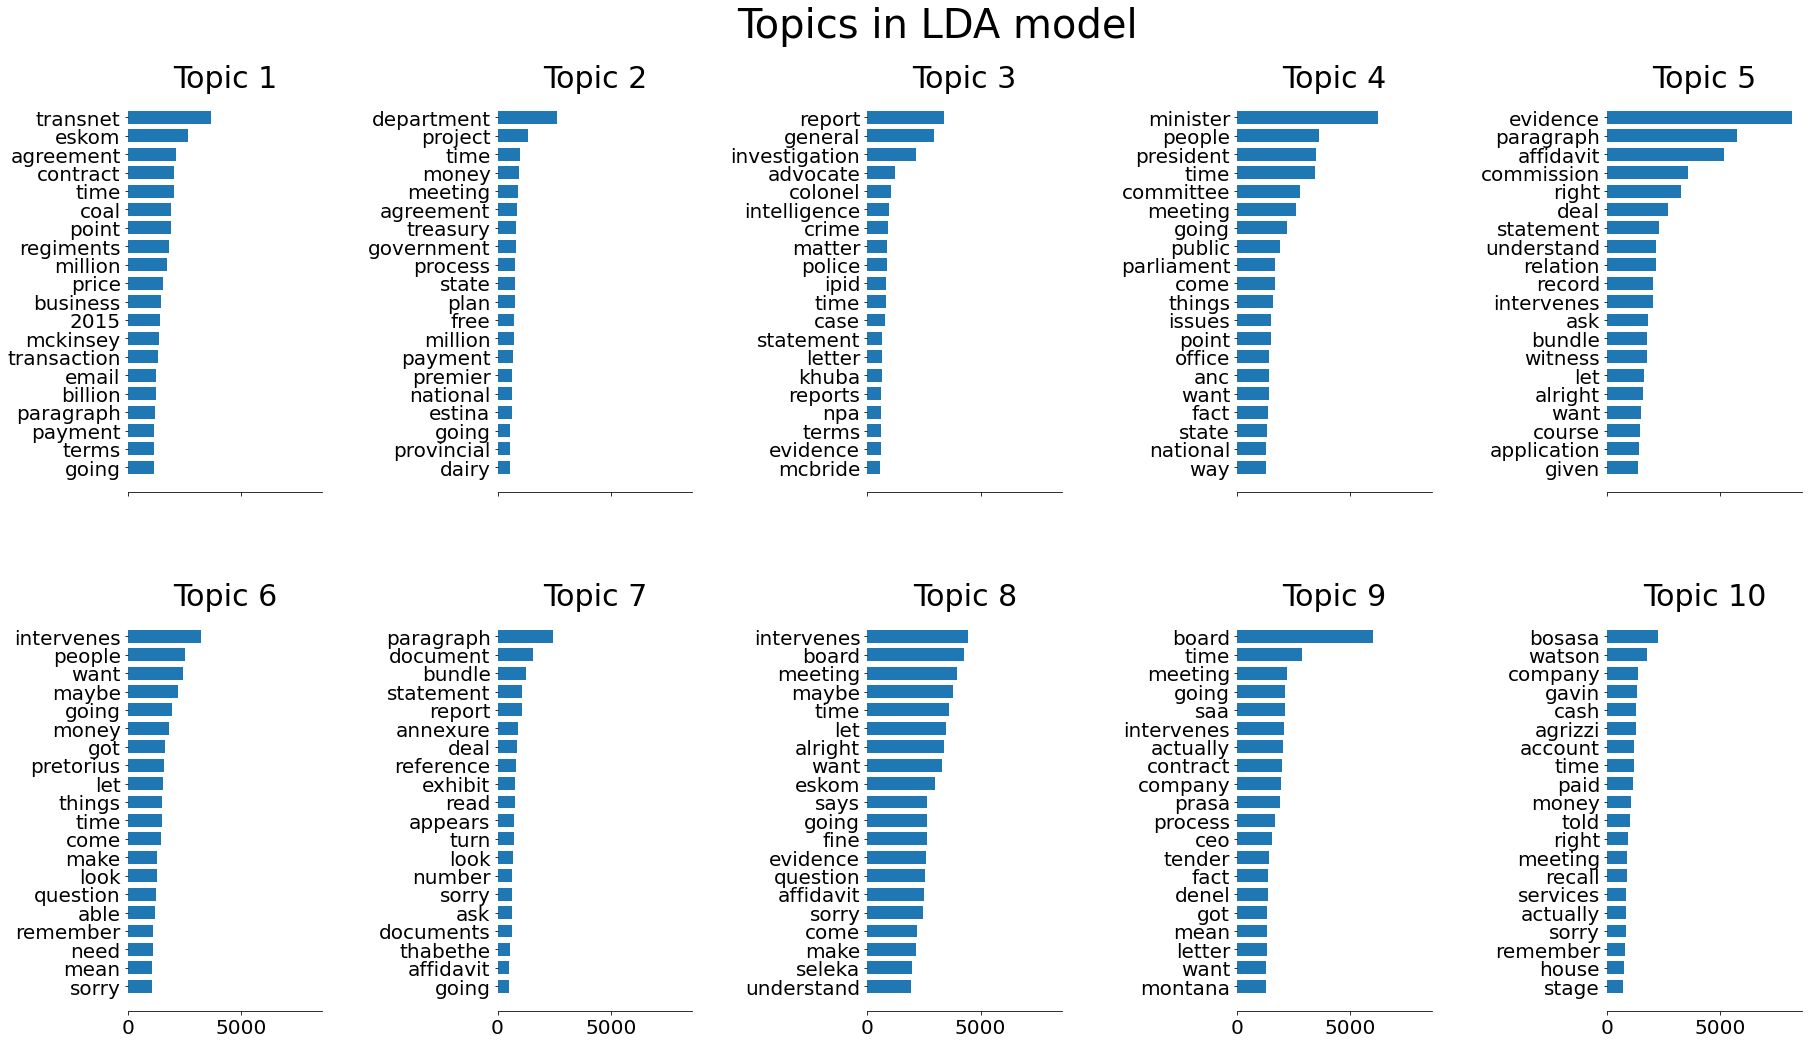

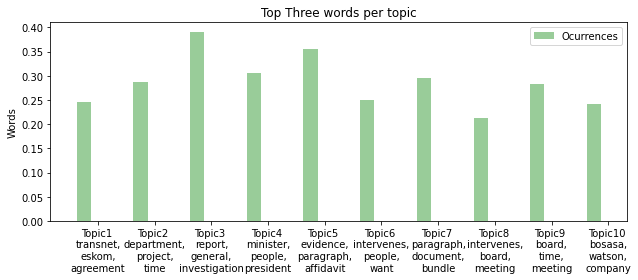

In [76]:
from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

n_samples = 2500
n_features = 1000
n_components = 10
n_top_words = 20


def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    counter = 0
    topicsList = []
    topicWeightsSum = []
    actualWords = []
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        # print("topf-------------> ", top_features)
        # print("weights-------------> ", weights)
        # if(top_features
        actualWords.append(top_features[0]) #save top 3 words in topic
        actualWords.append(top_features[1]) 
        actualWords.append(top_features[2])
        topThreeWeights = weights[0] + weights[1] + weights[2] #get weights of first 3 words
        topicsList.append(topThreeWeights) #add to array - we wll divive with total to get graph
        weightsSum = sum(weights) #get total weights sum
        topicWeightsSum.append(weightsSum) #will be used in graph

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    plot_bar_chart(actualWords, topicsList, topicWeightsSum)
#     now that we got this, lets plot our graph (after some calculations)
    # print("words-------------> ", actualWords)
    # print("word weights-------------> ", topicsList, )
    # print("topic weights-------------> ", topicWeightsSum)
    
def plot_bar_chart(actualWords, topicsList, topicWeightsSum):
    graphVals = []
    count = 0
    for topic in topicsList:
        val = ((topicsList[count]/topicWeightsSum[count])*100)/100
        graphVals.append(val)
        count = count+1
    # print(graphVals)
    wordCounter = 0
    import numpy as np
    import matplotlib.pyplot as plt
    data = [('Topic1 \n'+actualWords[0]+ ',\n' + actualWords[1]+ ',\n' + actualWords[2], graphVals[0]), 
            ('Topic2 \n'+actualWords[3]+ ',\n' + actualWords[4]+ ',\n' + actualWords[5], graphVals[1]), 
            ('Topic3 \n'+actualWords[6]+ ',\n' + actualWords[7]+ ',\n' + actualWords[8], graphVals[2]), 
            ('Topic4 \n'+actualWords[9]+ ',\n' + actualWords[10]+ ',\n' + actualWords[11], graphVals[3]),
            ('Topic5 \n'+actualWords[12]+ ',\n' + actualWords[13]+ ',\n' + actualWords[14], graphVals[4]),
            ('Topic6 \n'+actualWords[15]+ ',\n' + actualWords[16]+ ',\n' + actualWords[17], graphVals[5]),
            ('Topic7 \n'+actualWords[18]+ ',\n' + actualWords[19]+ ',\n' + actualWords[20], graphVals[6]),
            ('Topic8 \n'+actualWords[21]+ ',\n' + actualWords[22]+ ',\n' + actualWords[23], graphVals[7]),
            ('Topic9 \n'+actualWords[24]+ ',\n' + actualWords[25]+ ',\n' + actualWords[26], graphVals[8]),
            ('Topic10 \n'+actualWords[27]+ ',\n' + actualWords[28]+ ',\n' + actualWords[29], graphVals[9])
           ]
    n_groups = len(data)
    vals_films = [x[1] for x in data]
    legends_films = [x[0] for x in data]
    fig, ax = plt.subplots(figsize=(9,4))
    index = np.arange(n_groups)
    bar_width = 0.25
    opacity = 0.4
    rects1 = plt.bar(index, vals_films, bar_width,alpha=opacity,color='g',label='Ocurrences')

    plt.ylabel('Words')
    plt.title('Top Three words per topic')
    plt.xticks(index + bar_width, legends_films)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Load the dataset and vectorize it.
print("Loading dataset...")
t0 = time()
data_samples = papers['speech_processed1'][:n_samples]
print("done in %0.3fs." % (time() - t0))

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()

# Fit the NMF model
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(nmf, tfidf_feature_names, n_top_words,
               'Topics in NMF model (Frobenius norm)')

# Fit the NMF model
print('\n' * 2, "Fitting the NMF model (generalized Kullback-Leibler "
      "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(nmf, tfidf_feature_names, n_top_words,
               'Topics in NMF model (generalized Kullback-Leibler divergence)')

print('\n' * 2, "Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')

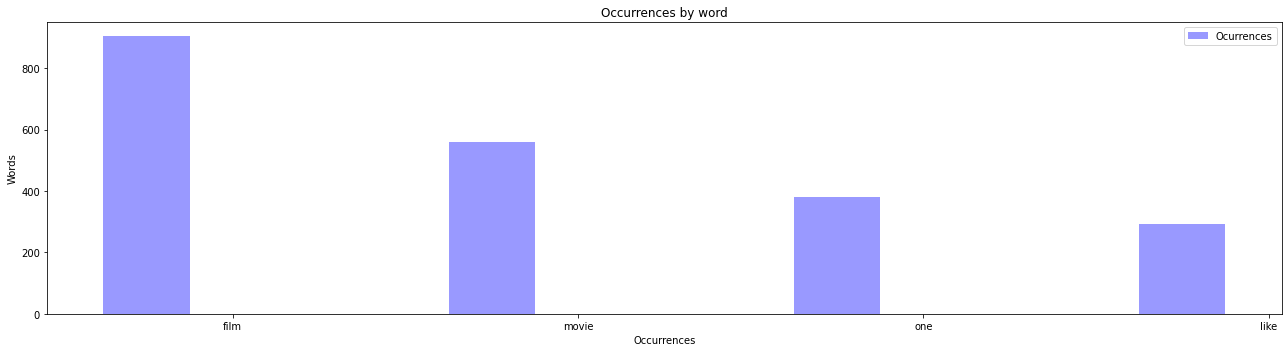

In [41]:
import numpy as np
import matplotlib.pyplot as plt

data = [('film', 904), ('movie', 561), ('one', 379), ('like', 292)]

n_groups = len(data)

vals_films = [x[1] for x in data]
legends_films = [x[0] for x in data]

fig, ax = plt.subplots(figsize=(18,5))

index = np.arange(n_groups)
# bar_width = 0.25
opacity = 0.4

rects1 = plt.bar(index, vals_films, bar_width,alpha=opacity,color='b',label='Ocurrences')

plt.xlabel('Occurrences')
plt.ylabel('Words')
plt.title('Occurrences by word')
plt.xticks(index + bar_width, legends_films)
plt.legend()

plt.tight_layout()
plt.show()